# Testing with real handwritten images

In [5]:
import tensorflow as tf
import numpy as np

In [2]:
# loading the trained model 
final_model = tf.keras.models.load_model('final_model')

2021-12-05 18:15:41.038153: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


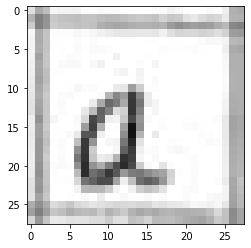

In [4]:
# here we will load an image from the images folder just to display the manually drawn letters
import PIL

from PIL import Image
img = Image.open('images/letter 1.png').convert('L')

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('images/letter 1.png')
# display the array of pixels as an image
pyplot.imshow(img, cmap=pyplot.cm.binary_r, vmin = 0, vmax = 255)
pyplot.show()

In [6]:
# viewing pixel data of test image
np.array(img)

array([[223, 170, 190, 246, 242, 244, 243, 252, 251, 250, 250, 250, 254,
        255, 255, 255, 251, 250, 243, 247, 255, 255, 255, 250, 253, 239,
        176, 171],
       [179, 129, 148, 200, 193, 192, 189, 196, 195, 189, 186, 186, 191,
        198, 201, 198, 194, 210, 199, 203, 225, 232, 219, 211, 216, 233,
        180, 177],
       [203, 129, 149, 204, 198, 197, 192, 196, 192, 175, 170, 166, 168,
        174, 178, 177, 174, 178, 156, 145, 154, 159, 154, 159, 173, 185,
        136, 132],
       [246, 172, 195, 253, 252, 252, 247, 251, 246, 241, 236, 231, 229,
        231, 232, 232, 230, 240, 223, 213, 215, 216, 210, 213, 223, 209,
        157, 154],
       [243, 171, 195, 255, 255, 255, 252, 255, 251, 255, 255, 255, 255,
        255, 255, 254, 253, 255, 255, 255, 255, 255, 251, 247, 248, 243,
        184, 181],
       [244, 173, 196, 255, 254, 255, 251, 254, 250, 250, 253, 255, 255,
        255, 255, 255, 255, 252, 254, 254, 253, 252, 254, 255, 255, 239,
        171, 167],
       [24

In [7]:
# first we normalize the test image
img_norm = tf.keras.utils.normalize(img)
img_norm

array([[0.17572292, 0.13395918, 0.14971908, 0.19384681, 0.19069483,
        0.19227082, 0.19148282, 0.19857478, 0.19778678, 0.19699879,
        0.19699879, 0.19699879, 0.20015077, 0.20093876, 0.20093876,
        0.20093876, 0.19778678, 0.19699879, 0.19148282, 0.1946348 ,
        0.20093876, 0.20093876, 0.20093876, 0.19699879, 0.19936277,
        0.18833084, 0.13868715, 0.13474717],
       [0.17214603, 0.12406054, 0.14233303, 0.19234193, 0.18560996,
        0.18464825, 0.18176312, 0.18849509, 0.18753338, 0.18176312,
        0.17887799, 0.17887799, 0.18368654, 0.19041851, 0.19330364,
        0.19041851, 0.18657167, 0.20195902, 0.19138022, 0.19522706,
        0.21638467, 0.22311664, 0.21061441, 0.20292073, 0.20772928,
        0.22407835, 0.17310774, 0.17022261],
       [0.22338641, 0.14195491, 0.16396343, 0.22448684, 0.21788429,
        0.21678386, 0.21128173, 0.21568343, 0.21128173, 0.1925745 ,
        0.18707237, 0.18267066, 0.18487152, 0.19147407, 0.19587577,
        0.19477535, 0.1914

In [8]:
#after the image has been normalized, we predict the letter using the best traiend model
# reshape 
img_norm_reshaped = img_norm.reshape(1, 28, 28, 1)
predictions = final_model.predict(img_norm_reshaped)
predictions

array([[4.8029044e-01, 3.8641638e-03, 1.4623771e-05, 4.9362220e-03,
        2.0762698e-05, 1.5860870e-06, 9.1048412e-02, 2.2296292e-04,
        1.3919349e-06, 1.2249425e-04, 9.2949821e-03, 6.9892799e-08,
        2.6659238e-01, 3.9342370e-02, 1.7433487e-03, 3.4271423e-05,
        1.8828992e-02, 3.1389274e-02, 1.8915090e-07, 7.3680353e-06,
        1.5940680e-03, 1.8796536e-05, 4.9754236e-02, 4.7612394e-04,
        3.9765521e-04, 2.8255972e-06]], dtype=float32)

In [9]:
# as we can notice we have an array of 26 numbers where each number is a probability likeliness of the image being that label
predictions.shape

(1, 26)

In [10]:
labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", 'o', "p", "q", 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [11]:
# getting the label of the prediction
index = np.argmax(predictions)
labels[index]

'a'